## Barkely and Astoria

In this notebook I look at the shape of Barkley and Astoria canyons and, in particular, the shape of their thalwegs. I then find an "average thalweg" to add to the lab canyon insert bathymetry.

Bathymetric data for Astoria comes from GEBCO 2014 (30 arc sec).

* Barkley and Astoria's bathymetries
* Particular features
* Thalweg shape
* Keep in mind for the lab canyon ...

In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import seaborn as sns
from netCDF4 import Dataset

%matplotlib inline

/home/kramosmu/anaconda3/lib/python3.5/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
sns.set_style('whitegrid')
sns.set_context('talk')

SouthVIgrid.mat gives lat shape 1474, lon shape 890 and dpth shape (890,1474)

In [3]:
def get_topo():
    
    topo=sio.loadmat('/ocean/kramosmu/Data/SouthVIgrid.mat')
    tDat = {'lon' : [], 'lat' : [], 'dpth' : []}

    tDat['lon'] = np.squeeze(np.array(topo['SouthVIgrid']['lon'][0][0]))
    tDat['lat'] = np.squeeze(np.array(topo['SouthVIgrid']['lat'][0][0]))
    tDat['dpth'] = np.squeeze(np.array(topo['SouthVIgrid']['depth'][0][0]))

    return tDat

In [36]:
def haversine(lon, lat):
    '''lon: np.array with longitudes
       lat: np array with latitudes
       returns: distance, np array with the distance between the points of lat, lon. Size is one less than lat, lon'''
    
    R = 6366.371 # km, Radius of earth at 48 deg N.
    dlon = lon[:-1] - lon[1:]
    dlat = lat[:-1] - lat[1:]
    a = (np.sin(dlat/2))**2 + (np.cos(lat[:-1]) * np.cos(lat[1:]) * (np.sin(dlon/2))**2)
    c = 2.0 * np.arctan2( np.sqrt(a), np.sqrt(1-a) )
    distance = R * c
    return distance

In [4]:
astoria_file = '/ocean/kramosmu/MultipleCanyons/data/gebco_bathy_Astoria/GEBCO_2014_Astoria.nc'

with Dataset(astoria_file, 'r') as nbl:
    dep_Ast = nbl.variables['elevation'][:]
    lon_Ast = nbl.variables['lon'][:]
    lat_Ast = nbl.variables['lat'][:]

In [5]:
tDat = get_topo()

Text(0.5,1,'Astoria Canyon and company')

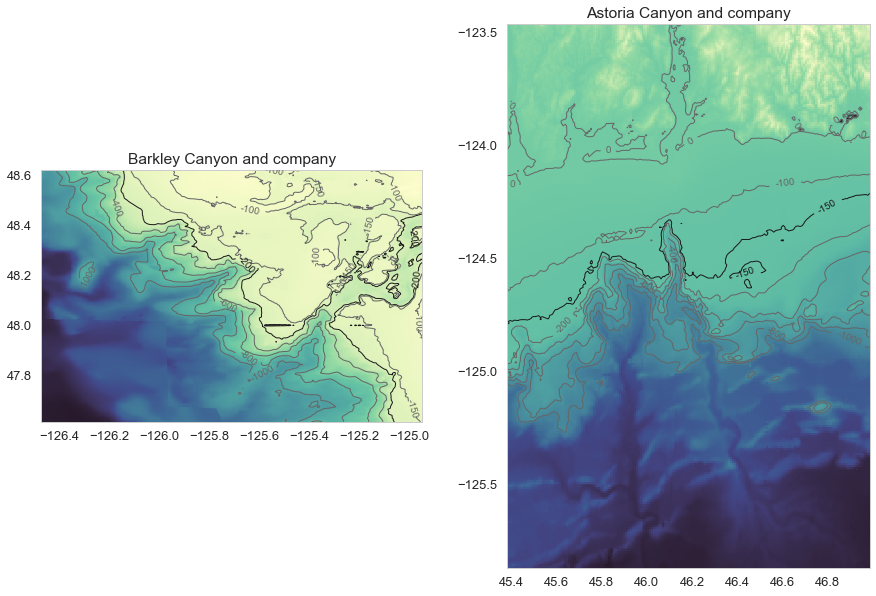

In [55]:
# Barkley
Wlim = 450 
Elim = 900
Nlim = 500
Slim = 50

# Astoria
AsW = 15
AsE =-15

plt.rcParams['contour.negative_linestyle'] = 'solid'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

# Barkley
ax1.pcolor(tDat['lon'][Wlim:Elim],tDat['lat'][Slim:Nlim],tDat['dpth'][Slim:Nlim,Wlim:Elim],cmap=cmo.cm.deep_r)
CS = ax1.contour(tDat['lon'][Wlim:Elim],tDat['lat'][Slim:Nlim],tDat['dpth'][Slim:Nlim,Wlim:Elim],
                 [-1000, -800, -600, -400, -200,-150, -100, 0],
                 colors=['0.4','0.4','0.4','0.4','0.1','0.4','0.4','0.4'],linewidths=[1])
ax1.clabel(CS, inline=1, fontsize=10,fmt='%1.0f')
ax1.set_aspect(1)
ax1.set_title('Barkley Canyon and company')

# Astoria
ax2.pcolor(lat_Ast,lon_Ast[AsW:AsE],np.fliplr(np.transpose(dep_Ast[:,AsW:AsE])),cmap=cmo.cm.deep_r)
CS2 = ax2.contour(lat_Ast,lon_Ast[AsW:AsE],np.fliplr(np.transpose(dep_Ast[:,AsW:AsE])),
                  [-1000, -800, -600, -400, -200,-150, -100, 0],
                  colors=['0.4','0.4','0.4','0.4','0.4','0.1','0.4','0.4'],
                  linewidths=[1] )
ax2.clabel(CS2, inline=1, fontsize=10,fmt='%1.0f')
ax2.set_aspect(1)
ax2.set_title('Astoria Canyon and company')

### Find thalwegs

**Astoria** 

Nicely lines up E-W so find deepest points across the shelf for a box around the canyon.

In [8]:
Nind = 113
Sind = 80
Eind = -117
Wind = 120

lat_box = lat_Ast[Sind:Nind]
lon_box = lon_Ast[Wind:Eind]
astoria = (dep_Ast[Sind:Nind,Wind:Eind])

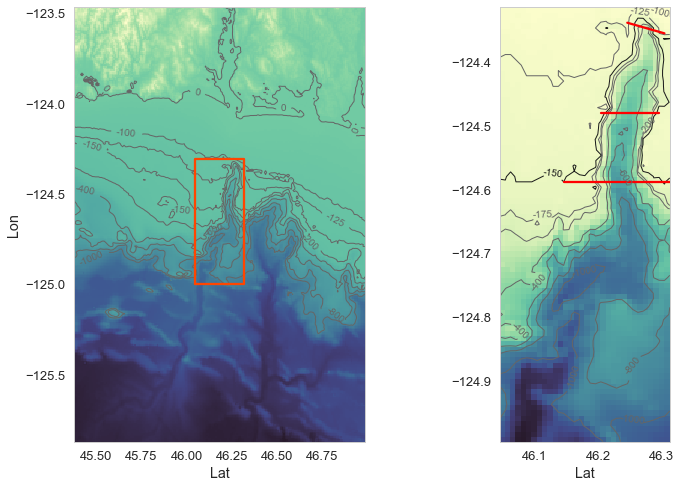

In [66]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))

# plot whole region
ax1.pcolor(lat_Ast,lon_Ast[15:-15],np.transpose(dep_Ast[:,15:-15]),cmap=cmo.cm.deep_r)
CS1 = ax1.contour(lat_Ast,lon_Ast[15:-15],np.transpose(dep_Ast[:,15:-15]),
                  [-1000, -800, -600, -400, -200, -150, -125,-100, 0],colors='0.4',linewidths=[1] )
ax1.clabel(CS1, inline=1, fontsize=10,fmt='%1.0f')

# plot red box
ax1.plot((lat_Ast[Sind],lat_Ast[Sind],lat_Ast[Nind],lat_Ast[Nind],lat_Ast[Sind] ),
         (lon_Ast[Wind],lon_Ast[Eind],lon_Ast[Eind],lon_Ast[Wind],lon_Ast[Wind]), marker='', color='orangered')

# plot only canyon
ax2.pcolor(lat_box,lon_box,np.transpose(astoria),cmap=cmo.cm.deep_r)
CS2 = ax2.contour(lat_box, lon_box, np.transpose(astoria), 
                  [-1000, -800, -600, -400, -200,-175,-150,-125,-100, 0],
                  colors=['0.4','0.4','0.4','0.4','0.4','0.4','0.1','0.4','0.4','0.4'],linewidths=[1] )
ax2.clabel(CS2, inline=1, fontsize=10,fmt='%1.0f')

# plot dots to measure width at head
ax2.plot([lat_box[31], lat_box[24]],[lon_box[77], lon_box[79]], 'r-')
lat_Whd_Ast = [lat_box[31], lat_box[24]] 
lon_Whd_Ast = [lon_box[77], lon_box[79]]

# plot dots to measure width at shelf break
ax2.plot([lat_box[32], lat_box[12]],[lon_box[49], lon_box[49]], 'r-')
lat_Wsb_Ast = [lat_box[32], lat_box[12]] 
lon_Wsb_Ast = [lon_box[49], lon_box[49]]

# plot dots to measure width at mid-length 
ax2.plot([lat_box[30], lat_box[19]],[lon_box[62], lon_box[62]], 'r-')
lat_Wml_Ast = [lat_box[30], lat_box[19]] 
lon_Wml_Ast = [lon_box[62], lon_box[62]]


# labels
ax1.set_ylabel('Lon')
ax1.set_xlabel('Lat')
ax2.set_xlabel('Lat')
ax1.set_aspect(1)
ax2.set_aspect(1)

In [67]:
# Find widths uisng Haversine formula
Whd_Ast = haversine(np.radians(lat_Whd_Ast),np.radians(lon_Whd_Ast))
print('Astoria W_head = %1.1f km' %Whd_Ast)                    

Wml_Ast = haversine(np.radians(lat_Wml_Ast),np.radians(lon_Wml_Ast))
print('Astoria W_mid = %1.1f km' %Wml_Ast)      

Wsb_Ast = haversine(np.radians(lat_Wsb_Ast),np.radians(lon_Wsb_Ast))
print('Astoria W_sb = %1.1f km' %Wsb_Ast)      

Astoria W_head = 4.1 km
Astoria W_mid = 5.8 km
Astoria W_sb = 10.5 km


In [42]:
# Find deepest points along each longitude
print(np.shape(np.transpose(astoria)))

thal_dep = np.min(np.transpose(astoria), axis=1)
thal_ind = np.argmin(np.transpose(astoria), axis=1)

(83, 33)


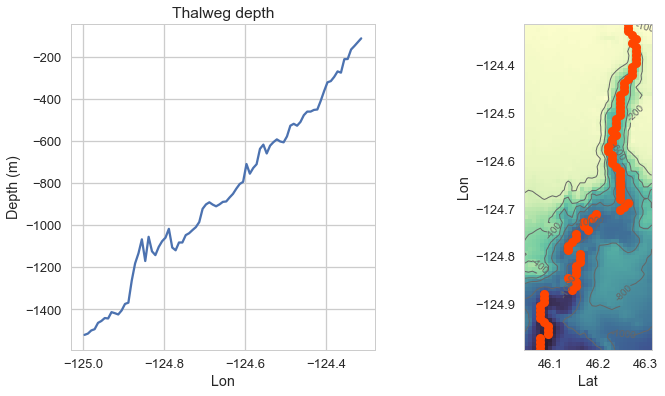

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.plot(lon_box, thal_dep)
ax1.set_title('Thalweg depth')
ax1.set_ylabel('Depth (m)')
ax1.set_xlabel('Lon')

ax2.pcolor(lat_box,lon_box,np.transpose(astoria),cmap=cmo.cm.deep_r)
CS2 = ax2.contour(lat_box, lon_box, np.transpose(astoria), [-1000, -800, -600, -400, -200, -100, 0],colors='0.4',
                  linewidths=[1] )
ax2.clabel(CS2, inline=1, fontsize=10,fmt='%1.0f')

ax2.plot(lat_box[thal_ind],lon_box, 'o', color='orangered')
ax2.set_ylabel('Lon')
ax2.set_xlabel('Lat')

ax2.set_aspect(1)

Convert lat-lon to km using Haversine fromula http://andrew.hedges.name/experiments/haversine/ 

In [44]:
delta_thalweg = haversine(np.radians(lat_box[thal_ind]),np.radians(lon_box))
dist_thalweg = np.zeros(np.shape(delta_thalweg))

distance = 0
for ii in range(len(dist_thalweg)):
    distance = distance + delta_thalweg[ii]
    dist_thalweg[ii] = distance 
    ii = ii+1

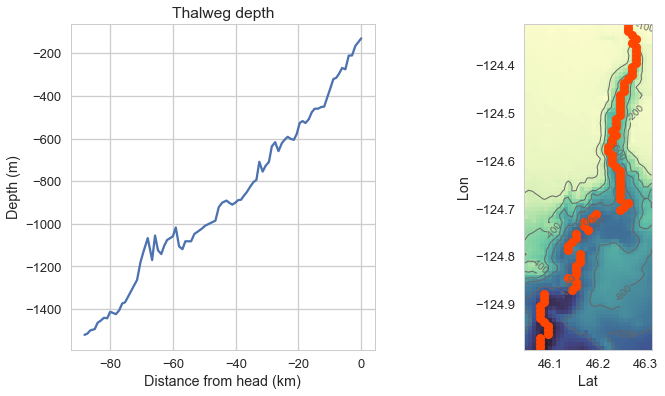

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.plot(dist_thalweg-dist_thalweg[len(dist_thalweg)-1], thal_dep[:-1])
ax1.set_title('Thalweg depth')
ax1.set_ylabel('Depth (m)')
ax1.set_xlabel('Distance from head (km)')

ax2.pcolor(lat_box,lon_box,np.transpose(astoria),cmap=cmo.cm.deep_r)
CS2 = ax2.contour(lat_box, lon_box, np.transpose(astoria), [-1000, -800, -600, -400, -200, -100, 0],colors='0.4',
                  linewidths=[1] )
ax2.clabel(CS2, inline=1, fontsize=10,fmt='%1.0f')
ax2.plot(lat_box[thal_ind],lon_box, 'o', color='orangered')
ax2.set_ylabel('Lon')
ax2.set_xlabel('Lat')
ax2.set_aspect(1)

**Barkley**

In [46]:
lat_box2 = tDat['lat'][340:430]
lon_box2 = tDat['lon'][550:650]
barkley_depths = tDat['dpth'][340:430,550:650]

barkley = barkley_depths

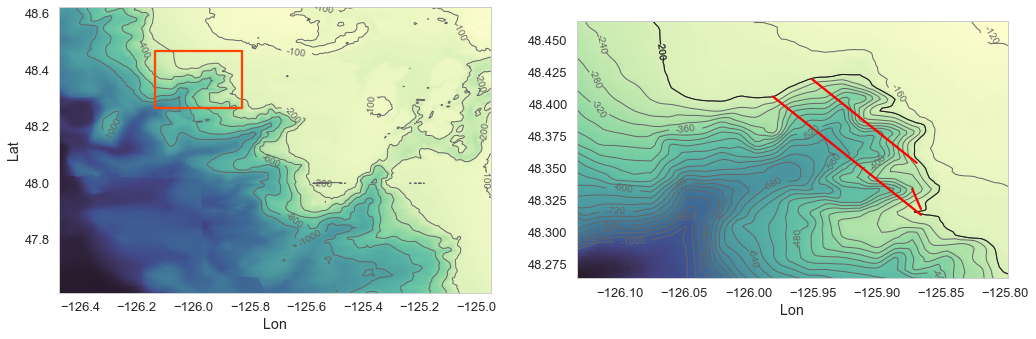

In [81]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,11))

ax1.pcolor(tDat['lon'][450:900],tDat['lat'][50:500],tDat['dpth'][50:500,450:900],cmap=cmo.cm.deep_r)
CS = ax1.contour(tDat['lon'][450:900],tDat['lat'][50:500],tDat['dpth'][50:500,450:900],
                 [-1000, -800, -600, -400, -200, -100, 0],colors='0.4',linewidths=[1])
ax1.clabel(CS, inline=1, fontsize=10,fmt='%1.0f')
ax1.set_aspect(1)

# Plot box
ax1.plot((tDat['lon'][550], tDat['lon'][640], tDat['lon'][640], tDat['lon'][550],tDat['lon'][550]),
         (tDat['lat'][340],tDat['lat'][340], tDat['lat'][430], tDat['lat'][430],tDat['lat'][340]), 
         marker='', color='orangered')

ax2.pcolor(lon_box2,lat_box2,barkley,cmap=cmo.cm.deep_r)
CS2 = ax2.contour(lon_box2, lat_box2, barkley, [ii for ii in range(-1000,0,40)],colors='0.4',
                  linewidths=[1] )
ax2.clabel(CS2, inline=1, fontsize=10,fmt='%1.0f')
ax2.pcolor(lon_box2,lat_box2,barkley,cmap=cmo.cm.deep_r)
CS2 = ax2.contour(lon_box2, lat_box2, barkley, [-200],colors='0.1',
                  linewidths=[1] )
ax2.clabel(CS2, inline=1, fontsize=10,fmt='%1.0f')

# plot dots to measure width at head
#ax2.plot([lon_box2[77], lon_box2[79]],[lat_box2[31], lat_box2[24]], 'r-')
#lat_Whd_Bar = [lat_box2[31], lat_box2[24]] 
#lon_Whd_Bar = [lon_box2[77], lon_box2[79]]

# plot dots to measure width at shelf break
ax2.plot([lon_box2[45], lon_box2[79]],[lat_box2[63], lat_box2[22]], 'r-')
lat_Wsb_Bar = [lat_box2[63], lat_box2[22]] 
lon_Wsb_Bar = [lon_box2[45], lon_box2[79]]

# plot dots to measure width at mid-length 
ax2.plot([lon_box2[54], lon_box2[78]],[lat_box2[69], lat_box2[40]], 'r-')
lat_Wml_Bar = [lat_box2[67], lat_box2[40]] 
lon_Wml_Bar = [lon_box2[54], lon_box2[78]]

ax1.set_xlabel('Lon')
ax1.set_ylabel('Lat')
ax2.set_xlabel('Lon')
ax1.set_aspect(1)
ax2.set_aspect(1)

In [83]:
# Find widths uisng Haversine formula
#Whd_Bar = haversine(np.radians(lat_Whd_Bar),np.radians(lon_Whd_Bar))
#print('Barkley W_head = %1.1f km' %Whd_Bar)                    

Wml_Bar = haversine(np.radians(lat_Wml_Bar),np.radians(lon_Wml_Bar))
print('Barkley W_mid = %1.1f km' %Wml_Bar)      

Wsb_Bar = haversine(np.radians(lat_Wsb_Bar),np.radians(lon_Wsb_Bar))
print('Barkley W_sb = %1.1f km' %Wsb_Bar)      

Barkley W_mid = 9.9 km
Barkley W_sb = 14.2 km


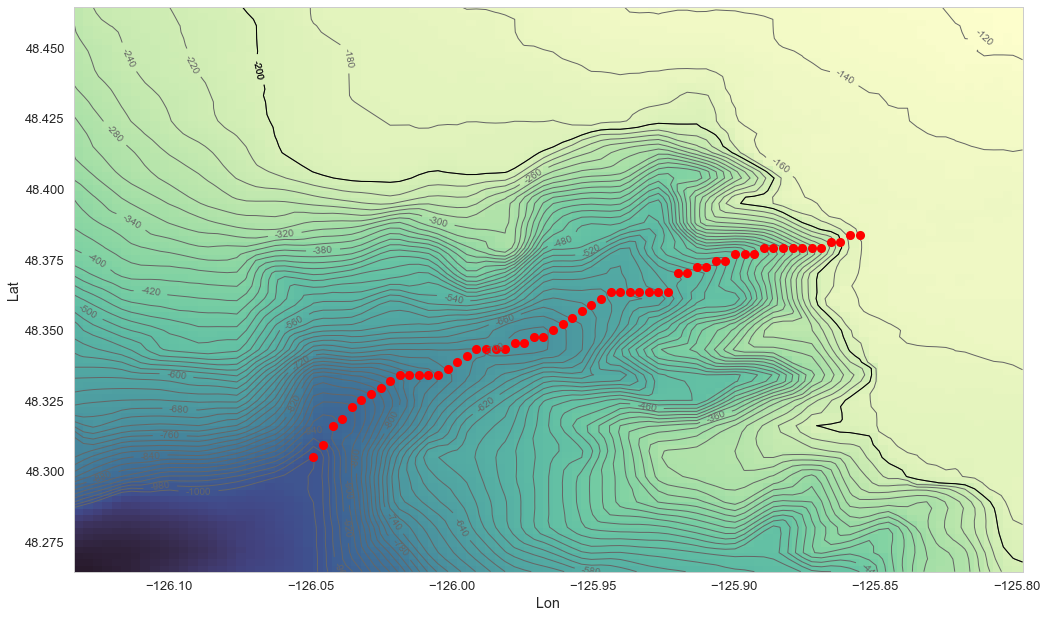

In [16]:
# Find deepest points along longitude, this one does not line-up nicely :-( 
# I'll just do it by hand because all my other algorithms suck. ...

fig, ax2 = plt.subplots(1, 1, figsize=(17,11))

ax2.pcolor(lon_box2,lat_box2,barkley,cmap=cmo.cm.deep_r)
CS2 = ax2.contour(lon_box2, lat_box2, barkley, [ii for ii in range(-1000,0,20)],colors='0.4',
                  linewidths=[1] )
ax2.clabel(CS2, inline=1, fontsize=10,fmt='%1.0f')
CS3 = ax2.contour(lon_box2, lat_box2, barkley,[-200],colors='k',
                  linewidths=[1] )
ax2.clabel(CS3, inline=1, fontsize=10,fmt='%1.0f')

ax2.set_xlabel('Lon')
ax2.set_ylabel('Lat')
ax2.set_aspect(1)

thal_x_ind = range(25,83)
thal_x = lon_box2[thal_x_ind]

thal_ind3 = [18,20,23,24,26,27,28,29,30,31,31,31,31,31,32,33,34,35,35,35,35,36,36,37,37,
            38,39,40,41,42,43,44,44,44,44,44,44,44,47,47,48,48,49,49,50,50,50,51,51,
            51,51,51,51,51,52,52,53,53]
thal_y = lat_box2[thal_ind3]

plt.plot(thal_x, thal_y, 'ro')

thal_dep3 = np.zeros(np.shape(thal_x_ind))

for ii in range(len(thal_x_ind)):
    thal_dep3[ii] = barkley[thal_ind3[ii],thal_x_ind[ii],]

In [17]:
delta_thalweg3 = haversine(np.radians(lat_box2[thal_ind3]),np.radians(thal_x))
dist_thalweg3 = np.zeros(np.shape(delta_thalweg3))

for ii in range(len(dist_thalweg3)-1):
    dist_thalweg3[ii] = dist_thalweg3[ii-1] + delta_thalweg3[ii] 

In [18]:
from scipy import stats

slope_B, intercept_B, r_value_B, p_value_B, std_err_B = stats.linregress(dist_thalweg3[:-1]-dist_thalweg3[len(dist_thalweg3)-2],
                                                                         thal_dep3[:-2])
slope_A, intercept_A, r_value_A, p_value_A, std_err_A = stats.linregress(dist_thalweg-dist_thalweg[len(dist_thalweg)-1],
                                                                         thal_dep[:-1])
print('Barkley fit:') 
print(slope_B, intercept_B, r_value_B, p_value_B, std_err_B)
print('Astoria fit:')
print(slope_A, intercept_A, r_value_A, p_value_A, std_err_A)
print('mean slope and intercept')
print(np.mean([slope_A, slope_B]), np.mean([intercept_A, intercept_B]))

Barkley fit:
28.7548277054 -312.652821917 0.97481290439 7.16829133979e-37 0.895250647404
Astoria fit:
14.6723740443 -237.88760383 0.989927318584 1.07800022589e-69 0.234608230105
mean slope and intercept
21.7136008749 -275.270212874


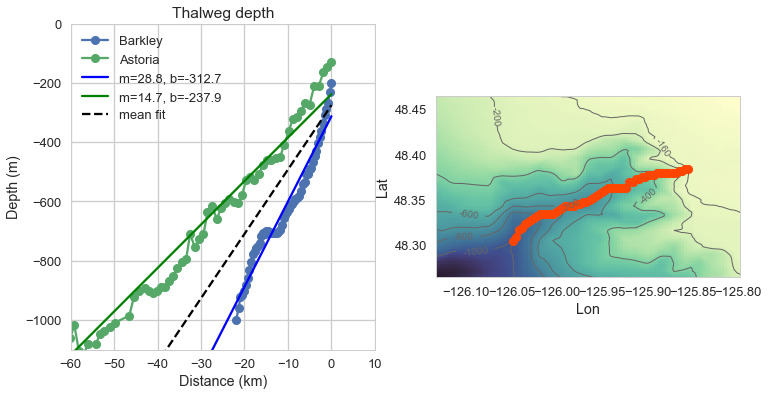

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.plot(dist_thalweg3[:-1]-dist_thalweg3[len(dist_thalweg3)-2], thal_dep3[:-2],'o-', label='Barkley')
ax1.plot(dist_thalweg-dist_thalweg[len(dist_thalweg)-1], thal_dep[:-1],'o-', label='Astoria')

ax1.plot(np.linspace(-90,0,50),slope_B*(np.linspace(-90,0,50))+intercept_B, 
         'b', label=('m=%1.1f, b=%1.1f' %(slope_B, intercept_B)) )
ax1.plot(np.linspace(-90,0,50),slope_A*(np.linspace(-90,0,50))+intercept_A, 
         'g', label=('m=%1.1f, b=%1.1f' %(slope_A, intercept_A)))
ax1.plot(np.linspace(-90,0,50),np.mean([slope_A, slope_B])*np.linspace(-90,0,50)+np.mean([intercept_A, intercept_B]),
         'k--', label = 'mean fit')

ax1.set_title('Thalweg depth')
ax1.set_ylabel('Depth (m)')
ax1.set_xlabel('Distance (km)')
ax1.legend(loc=0)
ax1.set_xlim(-60,10)
ax1.set_ylim(-1100,0)

ax2.pcolor(lon_box2,lat_box2,barkley,cmap=cmo.cm.deep_r)
CS2 = ax2.contour(lon_box2, lat_box2, barkley, [-1000, -800,-700, -600, -400, -200, -160, 0],colors='0.4',
                  linewidths=[1] )
ax2.clabel(CS2, inline=1, fontsize=10,fmt='%1.0f')
ax2.plot(lon_box2[thal_x_ind],lat_box2[thal_ind3], 'o', color='orangered')

ax2.set_xlabel('Lon')
ax2.set_ylabel('Lat')
ax2.set_aspect(1)